# Aprendizagem de Máquina I

##Professor: Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

##Aluno: João Victor Barboza Machado das Neves

#### j.victor.neves7@gmail.com

Esta aula é inspirada no Ex. 10 do Cap. 6 de [ITSL], e tem como objetivo estudar, em dados sintéticos, o comportamento dos procedimentos de seleção de modelos que vimos em sala (Lasso, Ridge e Elastic Net).

## Parte 1

.a) Gere um conjunto de dados $\mathbf{X}$ com $p = 20$ atributos e $n = 1.000$ observações. Após isso, gere um vetor de variáveis respostas de acordo com a equação $$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \varepsilon,$$ onde o vetor $\boldsymbol{\beta}$ contém a maioria das entradas iguais a zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [2]:
n = 1000 # Quantidade de Observações
p = 20 # Quantidade de variáveis explicativas

X = 10*np.random.random(size = (n,p)) # Gerando atributos uniformemente de 0 a 10
beta = np.array([0,1,-3,0,4,
                 -5,0,0,0,0,
                 8,-1,0,0,16,
                 0,6,0,0,-12]) # Escolher beta esparso
epsilon = np.random.normal(loc = 0, scale = 50, size = n) # Gerar um erro de observação "compatível"

y = X@beta + epsilon # @ é o produto matriz-vetor no numpy (mas não é a única forma!)
                    # Gerar a variável resposta

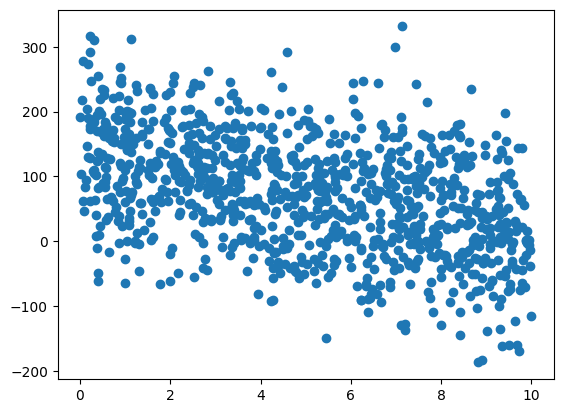

In [3]:
plt.scatter(X[:, -1],y) #Todas as observações na matriz X, referentes a um atributo de interesse
                      # e plotando contra a resposta y

b) Divida seu conjunto em treinamento e teste, com proporção de 90% e 10%, respectivamente.

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1) #Em X, atributos nas colunas e observações nas linhas

In [5]:
print(X.shape) #Teste de sanidade
print(y.shape)

(1000, 20)
(1000,)


In [6]:
print(X_tr.shape) #Teste de sanidade
print(y_tr.shape)

print(X_te.shape)
print(y_te.shape)

(900, 20)
(900,)
(100, 20)
(100,)


c) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` do `scikit-learn`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

d) Ajuste modelos, escolhendo os hiperparâmetros a priori, através das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet`. Compare os resultados para os $\boldsymbol{\beta}$ obtidos.

In [7]:
LinReg = LinearRegression() #Instaciando uma réplica da classe LinearRegression,
                            #sem alterar nenhum dos parâmetros declarados por padrão.

Las = Lasso(alpha = 4) # Idem, para o Lasso, fixando aplha = 4 (valor aleatório)

LinReg.fit(X_tr, y_tr) #Obter uma estimativa para beta

Las.fit(X_tr, y_tr) #Idem, através do Lasso

Lasso(alpha=4)

In [8]:
LinReg.coef_ # Estimativa de beta

array([  0.23913439,   0.58838966,  -2.50901882,   0.20920158,
         3.80242057,  -4.93778262,  -0.48893449,  -0.26804682,
         0.52961733,  -0.73591407,   8.17745858,  -0.88625657,
         0.30749421,   1.23601748,  16.51588217,   0.92801355,
         5.91545443,   0.57316678,   1.10204574, -12.47267668])

In [9]:
Las.coef_ # Estimativa de Beta, através do Lasso

array([  0.        ,   0.19102945,  -1.9969183 ,   0.        ,
         3.26777812,  -4.51607589,  -0.        ,  -0.        ,
         0.04740252,  -0.12124753,   7.69846915,  -0.4280084 ,
         0.        ,   0.8279714 ,  16.11284585,   0.4009907 ,
         5.47399515,   0.19066793,   0.65108183, -11.95451595])

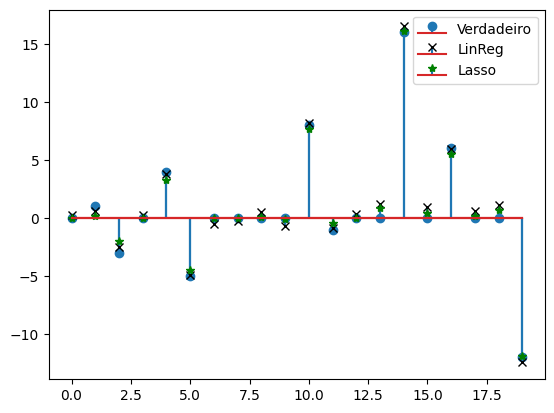

In [10]:
plt.stem(beta, label='Verdadeiro') #Plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label='LinReg') #Plota a estimativa para beta, com a "cabeça" sendo cruzes pretas
plt.stem(Las.coef_, markerfmt = 'g*', label='Lasso') #Plota a estimativa para beta, através do Lasso, com a "cabeça" sendo estrelas verdes
plt.legend() # Mostrar a legenda de cada gráfico

e) Faça as previsões com os modelos treinados acima no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento.

In [11]:
y_te_LinReg = LinReg.predict(X_te)
y_te_Las = Las.predict(X_te)

In [12]:
MSE_te_LinReg = MSE(y_te_LinReg, y_te)
MSE_te_Las = MSE(y_te_Las, y_te)

In [13]:
print(MSE_te_LinReg)
print(MSE_te_Las)

2582.826004941663
2577.8381357658527


## Parte 2

f) Agora, vamos encontrar o "melhor" valor do hiperparâmetro referente às penalizações acima e repetir as comparações que realizamos. Para isso, primeiramente, familiarize-se com a função `GridSearchCV`, lendo a sua documentação aqui: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

g) Implemente a busca em grade da função `GridSearchCV` para o `Lasso`, `Ridge` e `ElasticNet` e encontre os hiperparâmetros ótimos, dentro da grade que você definiu.

In [14]:
alphas = np.linspace (0.5, 50, 100, endpoint = True) # Declarando a grade de busca do hiperparâmetro de intresse
# alphas = np.logspace(-3, 3, 101, endpoint = True)
# alphas

grid_Las = {'alpha': alphas} # Alocando a grade de busca dentro de um dicionário
# grid_las

#Criando a réplica da classe GridSearchCV com as entradas adequadas
LasCV = GridSearchCV(estimator = Lasso(),
                     param_grid = grid_Las,
                     scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                     cv = 5,
                     verbose = 4,
                     refit = True
                     )

RidgeCV = GridSearchCV(estimator = Ridge(),
                       param_grid = grid_Las,
                       scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                       cv = 5,
                       verbose = 4,
                       refit = True
                       )

l1_ratios = np.linspace(0.1, 0.9, 9, endpoint= True) # Grade de busca para o l1_ratio
grid_ElaNet = {'alpha': alphas,
                'l1_ratio': l1_ratios} # Alocando a grade de busca dentro de um dicionário
# grid_las

#Criando a réplica da classe GridSearchCV com as entradas adequadas
ElaNetCV = GridSearchCV(estimator = ElasticNet(),
                     param_grid = grid_ElaNet,
                     scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                     cv = 5,
                     verbose = 1,
                     refit = True)

In [15]:
LasCV.fit(X_tr, y_tr) #Ajustando para encontrar o melhor alpha

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................alpha=0.5;, score=-3142.701 total time=   0.0s
[CV 2/5] END .....................alpha=0.5;, score=-2793.486 total time=   0.0s
[CV 3/5] END .....................alpha=0.5;, score=-3011.306 total time=   0.0s
[CV 4/5] END .....................alpha=0.5;, score=-2535.915 total time=   0.0s
[CV 5/5] END .....................alpha=0.5;, score=-1942.924 total time=   0.0s
[CV 1/5] END .....................alpha=1.0;, score=-3149.443 total time=   0.0s
[CV 2/5] END .....................alpha=1.0;, score=-2799.955 total time=   0.0s
[CV 3/5] END .....................alpha=1.0;, score=-3012.358 total time=   0.0s
[CV 4/5] END .....................alpha=1.0;, score=-2512.782 total time=   0.0s
[CV 5/5] END .....................alpha=1.0;, score=-1947.669 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-3156.283 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])},
             scoring='neg_mean_squared_error', verbose=4)

In [16]:
RidgeCV.fit(X_tr, y_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................alpha=0.5;, score=-3137.427 total time=   0.0s
[CV 2/5] END .....................alpha=0.5;, score=-2788.236 total time=   0.0s
[CV 3/5] END .....................alpha=0.5;, score=-3010.825 total time=   0.0s
[CV 4/5] END .....................alpha=0.5;, score=-2561.617 total time=   0.0s
[CV 5/5] END .....................alpha=0.5;, score=-1939.112 total time=   0.0s
[CV 1/5] END .....................alpha=1.0;, score=-3137.497 total time=   0.0s
[CV 2/5] END .....................alpha=1.0;, score=-2788.318 total time=   0.0s
[CV 3/5] END .....................alpha=1.0;, score=-3010.752 total time=   0.0s
[CV 4/5] END .....................alpha=1.0;, score=-2561.483 total time=   0.0s
[CV 5/5] END .....................alpha=1.0;, score=-1939.126 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-3137.566 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])},
             scoring='neg_mean_squared_error', verbose=4)

In [17]:
ElaNetCV.fit(X_tr, y_tr)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [18]:
pd.DataFrame(LasCV.cv_results_) # Visualizando o resultado da validação cruzada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006272,0.005491,0.003374,0.002793,0.5,{'alpha': 0.5},-3142.700830,-2793.485501,-3011.305828,-2535.914512,-1942.923928,-2685.266120,424.414343,4
1,0.001966,0.000132,0.001170,0.000058,1.0,{'alpha': 1.0},-3149.443152,-2799.954576,-3012.358044,-2512.781889,-1947.669225,-2684.441377,426.473791,3
2,0.001915,0.000065,0.001230,0.000075,1.5,{'alpha': 1.5},-3156.283465,-2806.145135,-3013.223192,-2491.020220,-1953.336927,-2684.001788,428.361702,1
3,0.002325,0.000289,0.001323,0.000111,2.0,{'alpha': 2.0},-3164.098368,-2812.939827,-3015.290824,-2470.629681,-1959.215984,-2684.434937,430.746178,2
4,0.001919,0.000104,0.002247,0.001981,2.5,{'alpha': 2.5},-3170.377696,-2820.922955,-3018.585630,-2451.610339,-1965.917339,-2685.482792,432.873047,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003163,0.002276,0.001246,0.000141,48.0,{'alpha': 48.0},-4620.267105,-4833.917266,-4206.338349,-3285.485995,-3556.273842,-4100.456511,596.605467,96
96,0.002610,0.001347,0.002759,0.002949,48.5,{'alpha': 48.5},-4632.438003,-4854.144131,-4228.181207,-3302.721610,-3572.874913,-4118.071973,596.746969,97
97,0.001902,0.000056,0.001240,0.000116,49.0,{'alpha': 49.0},-4644.726311,-4874.539571,-4250.256608,-3320.175865,-3589.643944,-4135.868460,596.887192,98
98,0.001860,0.000075,0.001454,0.000522,49.5,{'alpha': 49.5},-4657.132029,-4895.103585,-4272.564503,-3337.848760,-3606.580937,-4153.845963,597.026677,99


In [19]:
pd.DataFrame(RidgeCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003949,0.002622,0.002759,0.002919,0.5,{'alpha': 0.5},-3137.427386,-2788.236412,-3010.824514,-2561.616775,-1939.112209,-2687.443459,422.623254,100
1,0.003646,0.002937,0.001276,0.000067,1.0,{'alpha': 1.0},-3137.496863,-2788.317874,-3010.751932,-2561.483167,-1939.125873,-2687.435142,422.633952,99
2,0.002082,0.000041,0.001251,0.000088,1.5,{'alpha': 1.5},-3137.566377,-2788.399386,-3010.679443,-2561.349660,-1939.139604,-2687.426894,422.644661,98
3,0.001961,0.000076,0.001168,0.000019,2.0,{'alpha': 2.0},-3137.635929,-2788.480950,-3010.607047,-2561.216253,-1939.153401,-2687.418716,422.655381,97
4,0.002051,0.000142,0.001218,0.000024,2.5,{'alpha': 2.5},-3137.705518,-2788.562565,-3010.534745,-2561.082947,-1939.167265,-2687.410608,422.666112,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.011009,0.005422,0.003514,0.004544,48.0,{'alpha': 48.0},-3144.190591,-2796.199706,-3004.338281,-2549.365760,-1940.701660,-2686.959199,423.687570,5
96,0.004128,0.002395,0.010683,0.011724,48.5,{'alpha': 48.5},-3144.263503,-2796.285899,-3004.274335,-2549.241483,-1940.721473,-2686.957339,423.699271,4
97,0.004872,0.004311,0.004540,0.004124,49.0,{'alpha': 49.0},-3144.336449,-2796.372142,-3004.210478,-2549.117302,-1940.741349,-2686.955544,423.710982,3
98,0.005682,0.004246,0.003458,0.002172,49.5,{'alpha': 49.5},-3144.409431,-2796.458432,-3004.146710,-2548.993216,-1940.761289,-2686.953816,423.722703,2


In [20]:
pd.DataFrame(ElaNetCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005505,0.002924,0.002803,0.001816,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",-3189.887380,-2851.176877,-2981.753001,-2492.118855,-1960.979487,-2695.183120,431.619908,17
1,0.009513,0.002873,0.004891,0.003937,0.5,0.2,"{'alpha': 0.5, 'l1_ratio': 0.2}",-3184.087675,-2844.124634,-2983.709603,-2495.662216,-1958.017842,-2693.120394,430.733963,14
2,0.003731,0.002898,0.001290,0.000100,0.5,0.3,"{'alpha': 0.5, 'l1_ratio': 0.30000000000000004}",-3178.395775,-2837.216942,-2985.972029,-2499.511284,-1955.274856,-2691.274177,429.860809,13
3,0.001833,0.000082,0.001072,0.000066,0.5,0.4,"{'alpha': 0.5, 'l1_ratio': 0.4}",-3172.816396,-2830.460253,-2988.550800,-2503.676070,-1952.758753,-2689.652455,429.002097,10
4,0.002302,0.001046,0.001143,0.000072,0.5,0.5,"{'alpha': 0.5, 'l1_ratio': 0.5}",-3167.354432,-2823.861270,-2991.456817,-2508.166936,-1950.478059,-2688.263503,428.159595,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.001102,0.000035,0.000672,0.000017,50.0,0.5,"{'alpha': 50.0, 'l1_ratio': 0.5}",-6376.392790,-6855.479769,-6117.829569,-4999.128386,-5523.629614,-5974.492026,650.049294,840
896,0.001098,0.000036,0.000705,0.000057,50.0,0.6,"{'alpha': 50.0, 'l1_ratio': 0.6}",-6244.517108,-6712.043649,-5969.512540,-4870.645321,-5376.062683,-5834.556260,647.395686,801
897,0.001126,0.000046,0.000699,0.000054,50.0,0.7,"{'alpha': 50.0, 'l1_ratio': 0.7000000000000001}",-6061.419538,-6507.675456,-5765.402937,-4688.733524,-5168.523821,-5638.351055,643.951104,743
898,0.001091,0.000016,0.000710,0.000021,50.0,0.8,"{'alpha': 50.0, 'l1_ratio': 0.8}",-5800.980122,-6214.688765,-5470.165514,-4429.475407,-4872.730663,-5357.608094,638.806952,660


In [21]:
LasCV.best_estimator_ # Vendo o melhor alpha obtido

Lasso(alpha=np.float64(1.5))

In [22]:
RidgeCV.best_estimator_

Ridge(alpha=np.float64(50.0))

In [23]:
ElaNetCV.best_estimator_

ElasticNet(alpha=np.float64(1.0), l1_ratio=np.float64(0.9))

In [24]:
LasCV.best_estimator_.coef_, RidgeCV.best_estimator_.coef_, ElaNetCV.best_estimator_.coef_ # Vendo os coeficientes obtidos com o melhor alpha e l1_ratio(ElasticNet)

(array([  0.05777474,   0.43854633,  -2.31181171,   0.02051561,
          3.60277283,  -4.78080654,  -0.25348085,  -0.13684007,
          0.33897123,  -0.50327835,   7.99916967,  -0.72721491,
          0.10027715,   1.08304707,  16.36197075,   0.72691713,
          5.75256041,   0.42812076,   0.9231932 , -12.27972472]),
 array([  0.23993714,   0.58996458,  -2.48694842,   0.20644479,
          3.77360073,  -4.90673484,  -0.4797971 ,  -0.27373459,
          0.52850313,  -0.72809077,   8.12279706,  -0.87847977,
          0.30306918,   1.23369223,  16.41408813,   0.9121227 ,
          5.87639741,   0.57773811,   1.09696179, -12.39449952]),
 array([  0.13306242,   0.50216634,  -2.35282109,   0.09250594,
          3.632735  ,  -4.78893877,  -0.33351545,  -0.19995713,
          0.41470412,  -0.58438013,   7.97398346,  -0.77788637,
          0.17694358,   1.1409175 ,  16.24211092,   0.78064403,
          5.74885608,   0.49504696,   0.98687682, -12.21842601]))

h) Compare os $\boldsymbol{\beta}$ obtidos com esses procedimentos com os $\boldsymbol{\beta}$ obtidos anteriormente.

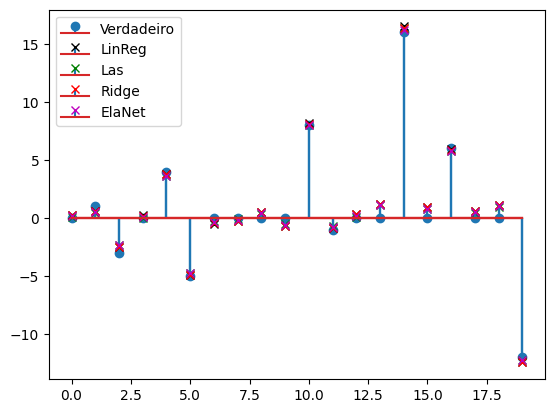

In [25]:
plt.stem(beta, label = 'Verdadeiro') # Plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label = 'LinReg') # Plota a estimativa para beta, com a "cabeça" sendo cruzes pretas
plt.stem(LasCV.best_estimator_.coef_, markerfmt = 'gx', label = 'Las') # Plota a estimativa para beta, através do lasso, com a "cabeça" sendo cruzes verdes
plt.stem(RidgeCV.best_estimator_.coef_, markerfmt = 'rx', label = 'Ridge') # Plota a estimativa para beta, com a "cabeça" sendo cruzes vermelhas
plt.stem(ElaNetCV.best_estimator_.coef_, markerfmt = 'mx', label = 'ElaNet') # Plota a estimativa para beta, com a "cabeça" sendo cruzes magentas

plt.legend() # Mostrar a legenda de cada gráfico

i) Faça as previsões com os novos modelos no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento. Compare com o resultado obtido no item e).

In [26]:
y_te_LinReg = LinReg.predict(X_te)
y_te_LasCV = LasCV.predict(X_te)
y_te_RidgeCV = RidgeCV.predict(X_te)
y_te_ElaNetCV = ElaNetCV.predict(X_te)

In [27]:
MSE_te_LinReg = MSE(y_te_LinReg, y_te)
MSE_te_LasCV = MSE(y_te_LasCV, y_te)
MSE_te_RidgeCV = MSE(y_te_RidgeCV, y_te)
MSE_te_ElaNetCV = MSE(y_te_ElaNetCV, y_te)

In [28]:
print(MSE_te_LinReg)
print(MSE_te_LasCV)
print(MSE_te_RidgeCV)
print(MSE_te_ElaNetCV)

2582.826004941663
2585.3727808487806
2578.992809077747
2577.805924235032
